<a href="https://colab.research.google.com/github/Meeta49/Fake-social-media-account/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fake Account Detection using XGBoost Classifier**

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Added for Colab environment to access files from Google Drive
from google.colab import drive
drive.mount('/content/drive')






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# *STEP 1: Load Datasets*

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

# Print columns to help identify the correct target column
print("\nTrain DataFrame Columns:", train.columns.tolist())
print("Test DataFrame Columns:", test.columns.tolist())

Train Shape: (576, 12)
Test Shape: (120, 12)

Train DataFrame Columns: ['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 'description length', 'external URL', 'private', '#posts', '#followers', '#follows', 'fake']
Test DataFrame Columns: ['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 'description length', 'external URL', 'private', '#posts', '#followers', '#follows', 'fake']


# STEP 2: Split Features & Target

In [ ]:
target = 'fake'

X_train = train.drop(target, axis=1)
y_train = train[target]

X_test = test.drop(target, axis=1)
y_test = test[target]

# STEP 3: Train XGBoost Model

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

# STEP 4: Predictions

In [ ]:
xgb_pred = xgb_model.predict(X_test)

# STEP 5: Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred)
recall = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)

print("\n============================")
print("📌 XGBoost Classifier Results")
print("============================")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))

print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))



📌 XGBoost Classifier Results
Accuracy  : 0.9083
Precision : 0.9153
Recall    : 0.9000
F1 Score  : 0.9076

Confusion Matrix:
[[55  5]
 [ 6 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        60
           1       0.92      0.90      0.91        60

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



# ROC Curve + AUC (Only Plot)

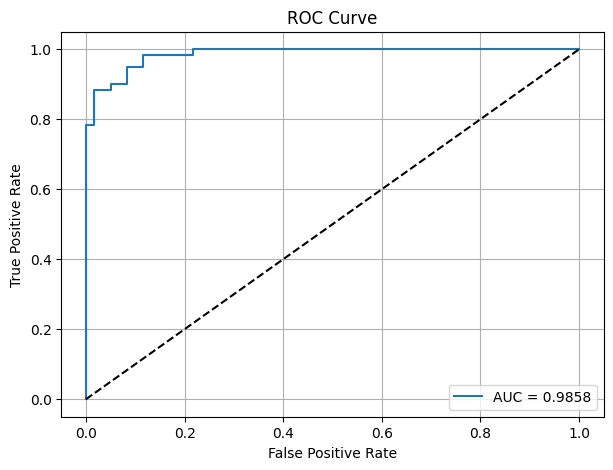

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilities for class 1
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="AUC = {:.4f}".format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
